 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
wr_df = pd.read_csv('Resources/whale_returns.csv')
wr_df['Date'] = pd.to_datetime(wr_df['Date'])

In [3]:
# Count nulls
wr_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
wr_df.dropna(inplace = True)
wr_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
ar_df = pd.read_csv('Resources/algo_returns.csv')
ar_df['Date'] = pd.to_datetime(ar_df['Date'])

In [6]:
# Count nulls
ar_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
ar_df.dropna(inplace = True)
ar_df.head()

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp5_df = pd.read_csv('Resources/sp500_history.csv', infer_datetime_format=True, parse_dates=True, index_col='Date')
sp5_df = sp5_df.reindex(index=sp5_df.index[::-1])

In [9]:
# Check Data Types
sp5_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
#sp5_df['Date'] = pd.to_datetime(sp5_df['Date'])
sp5_df['Close'] = sp5_df['Close'].str.replace('$', '')
sp5_df['Close'] = pd.to_numeric(sp5_df['Close'])

<ipython-input-10-f2fad6499fec>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp5_df['Close'] = sp5_df['Close'].str.replace('$', '')


In [11]:
# Calculate Daily Returns
sp5_df['Close'] = sp5_df['Close'].pct_change()

In [12]:
# Drop nulls
sp5_df.dropna(inplace = True)

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp5_df['S&P 500'] = sp5_df['Close']
del sp5_df['Close']
sp5_df.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
comb_df = pd.merge(wr_df, ar_df, how = 'inner', on = 'Date')
comb_df = pd.merge(comb_df, sp5_df, how = 'inner', on = 'Date')

In [15]:
comb_df.set_index('Date', inplace = True)
comb_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

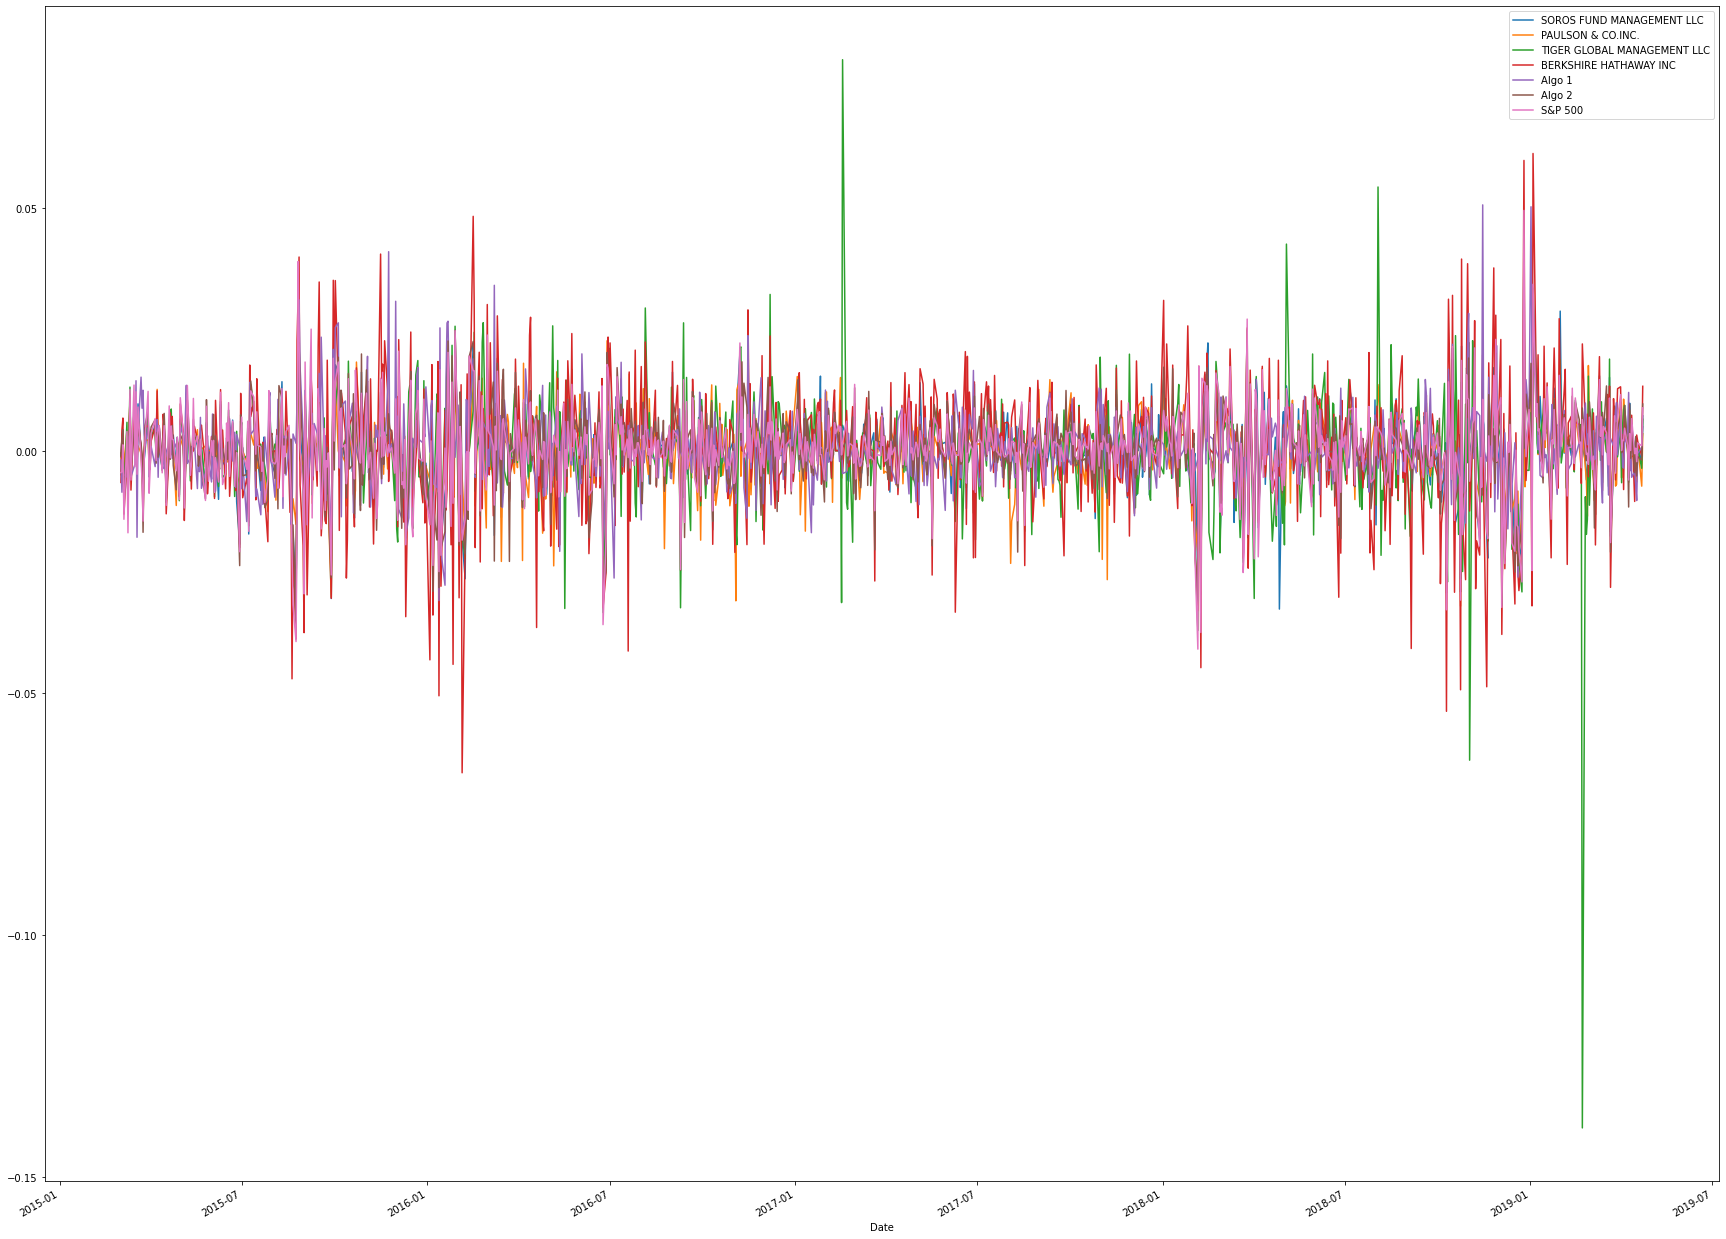

In [16]:
# Plot daily returns of all portfolios
comb_df.plot(figsize = (30, 24))

#### Calculate and Plot cumulative returns.

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                   0.998734            0.995019   
2015-03-04                   1.000962            0.998245   
2015-03-05                   1.004981            1.002314   
2015-03-06                   0.997037            0.998731   
2015-03-09                   0.997617            1.002951   
...                               ...                 ...   
2019-04-16                   1.160965            0.786811   
2019-04-17                   1.157602            0.781723   
2019-04-18                   1.159278            0.782678   
2019-04-22                   1.156280            0.776939   
2019-04-23                   1.164568            0.779646   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                     0.999504             

<AxesSubplot:xlabel='Date'>

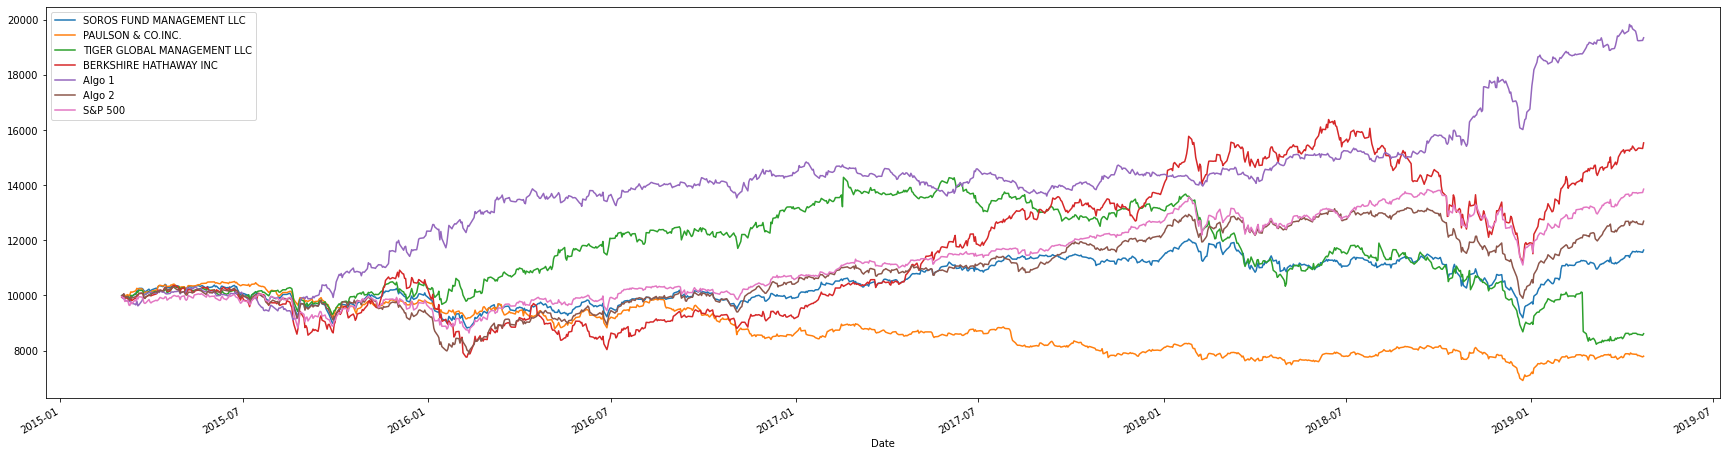

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + comb_df).cumprod()
print(cumulative_returns)
# Plot cumulative returns
(10000 * cumulative_returns).plot(figsize = (30, 8))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

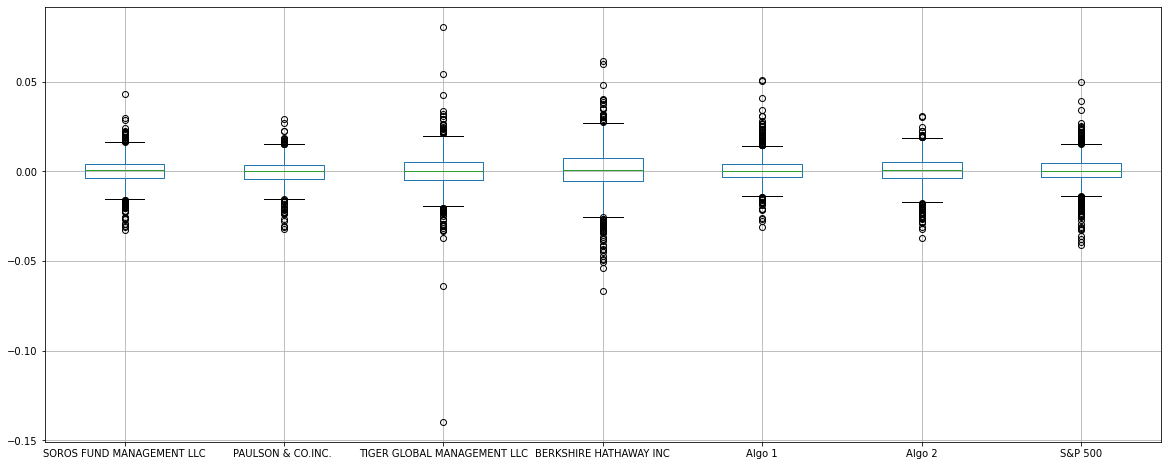

In [18]:
# Box plot to visually show risk
comb_df.boxplot(figsize = (20, 8))

### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
comb_df.std()
whale_std = comb_df.std()
del whale_std["S&P 500"]
whale_std.head()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
sp5_std = comb_df['S&P 500'].std()

# Determine which portfolios are riskier than the S&P 500
risk = []
names = []
for i, v in whale_std.iteritems():
    if v > sp5_std:
        risk.append(f"{i} is RISKIER than the S & P 500 ({round(v, 5)} > {round(sp5_std, 5)})")
    else:
        risk.append(f"{i} is LESS RISKY than the S & P 500 ({round(v, 5)} < {round(sp5_std, 5)})")

risk

['SOROS FUND MANAGEMENT LLC is LESS RISKY than the S & P 500 (0.0079 < 0.00855)',
 'PAULSON & CO.INC.  is LESS RISKY than the S & P 500 (0.00702 < 0.00855)',
 'TIGER GLOBAL MANAGEMENT LLC is RISKIER than the S & P 500 (0.01089 > 0.00855)',
 'BERKSHIRE HATHAWAY INC is RISKIER than the S & P 500 (0.01292 > 0.00855)',
 'Algo 1 is LESS RISKY than the S & P 500 (0.00762 < 0.00855)',
 'Algo 2 is LESS RISKY than the S & P 500 (0.00834 < 0.00855)']

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
comb_df.groupby(comb_df.index.year).std()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015,0.007922,0.005959,0.008443,0.012681,0.008920,0.008651,0.009936
2016,0.007988,0.008246,0.010295,0.014039,0.008366,0.009676,0.008249
2017,0.004942,0.005935,0.008290,0.008566,0.005220,0.005431,0.004212
2018,0.009965,0.007484,0.012484,0.015265,0.007548,0.009056,0.010742
2019,0.007434,0.007104,0.018166,0.012797,0.007980,0.007811,0.007835


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-16                   0.006711            0.006224   
2019-04-17                   0.006773            0.006370   
2019-04-18                   0.006633            0.006303   
2019-04-22                   0.005915            0.006400   
2019-04-23                   0.004315            0.005695   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN             

<AxesSubplot:xlabel='Date'>

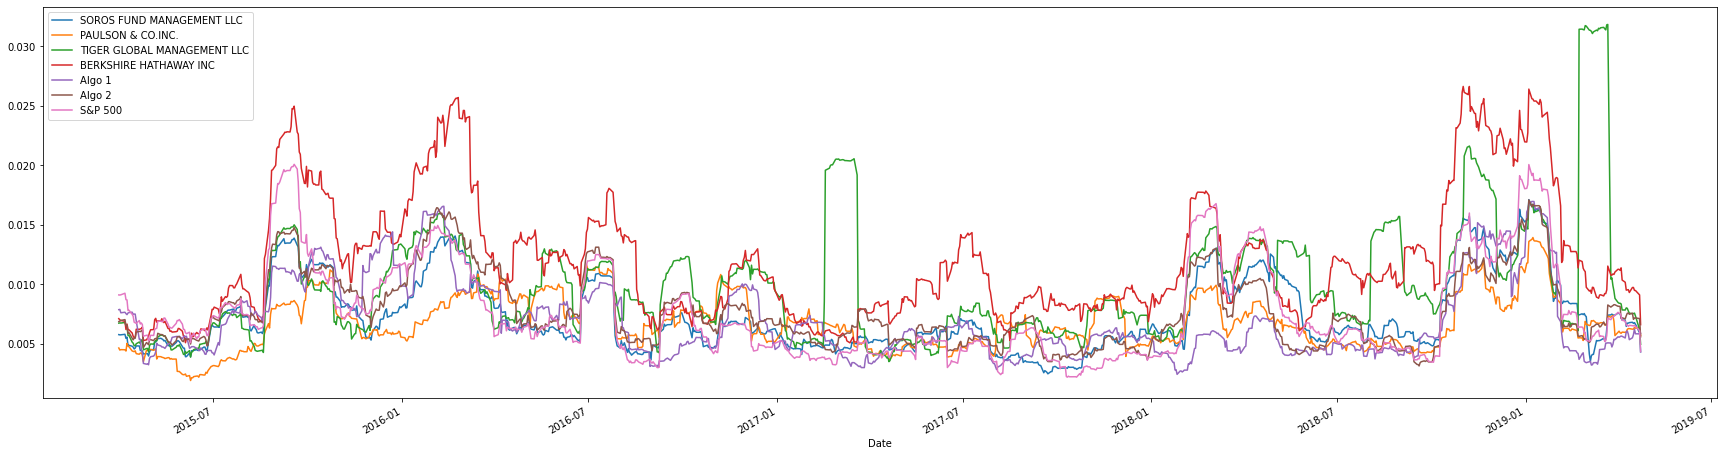

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
roll_21 = comb_df.rolling(window=21).std()
print(roll_21)
# Plot the rolling standard deviation
roll_21.plot(figsize = (30, 8))

### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2         

<AxesSubplot:>

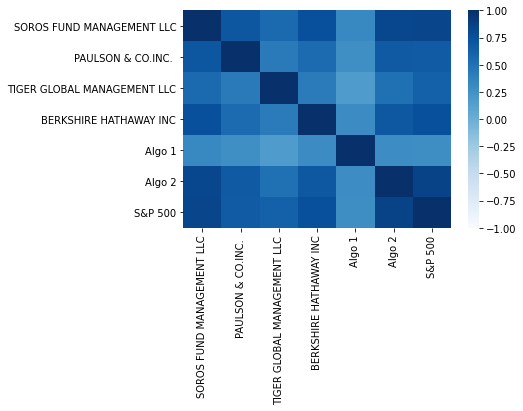

In [23]:
# Calculate the correlation
corr = comb_df.corr()
print(corr)
# Display de correlation matrix
sns.heatmap(corr, cmap = 'Blues', vmin = -1, vmax = 1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

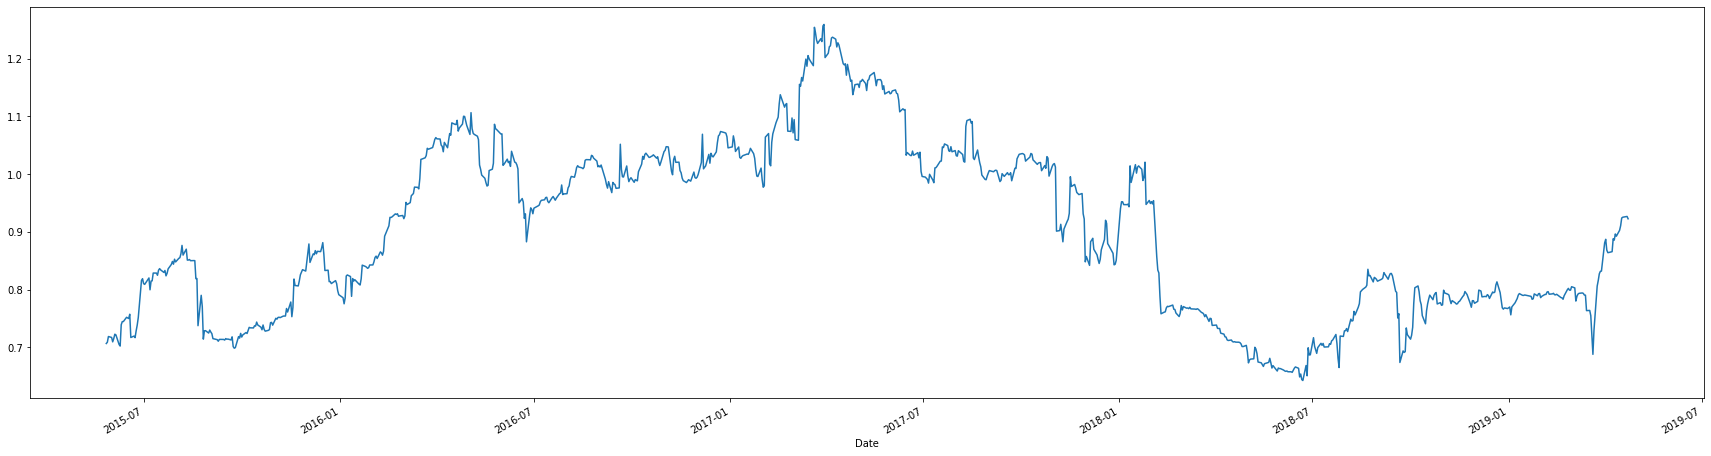

In [24]:
# Calculate covariance of a single portfolio
covariance = comb_df['Algo 2'].rolling(window = 60).cov(comb_df['S&P 500'])

# Calculate variance of S&P 500
variance = comb_df['S&P 500'].rolling(window = 60).var()

# Computing beta
a2_beta = covariance / variance

# Plot beta trend
a2_beta.plot(figsize = (30, 8))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

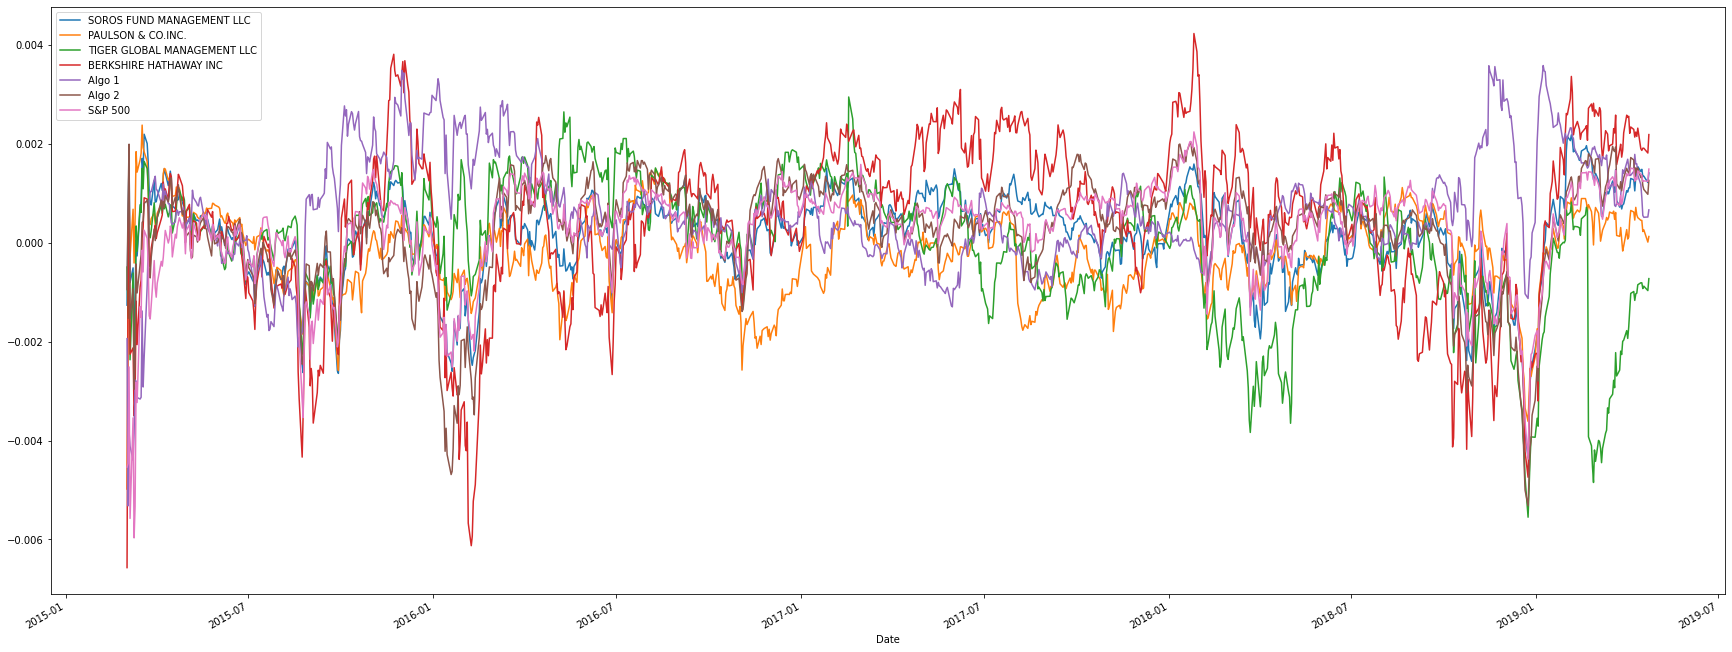

In [25]:
# Use `ewm` to calculate the rolling window
comb_df.ewm(halflife = 21.0).mean().plot(figsize = (30, 12))

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe = comb_df.mean() / comb_df.std() * np.sqrt(252)
sharpe.head()

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
dtype: float64

<AxesSubplot:>

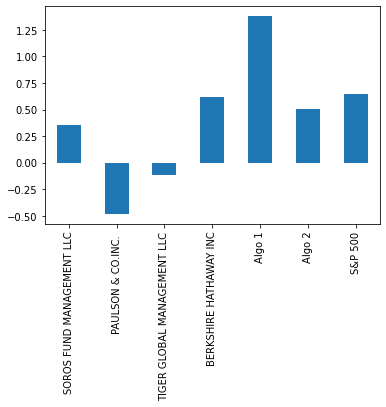

In [27]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

# Algo 1 outperforms the index and whales. Algo 2 outperforms some of the whales but not the index.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
aal_df = pd.read_csv('Resources/aal.csv')
aal_df['American Airlines'] = aal_df['Close'].pct_change()
aal_df['Date'] = pd.to_datetime(aal_df['Date']).dt.date
aal_df = aal_df.reindex(index = aal_df.index[::1])
del aal_df['Close']
aal_df.head()

,Date,American Airlines
0,2015-03-03,NaN
1,2015-03-04,0.003691
2,2015-03-05,-0.011236
3,2015-03-06,-0.008264
4,2015-03-09,-0.001667


In [29]:
# Reading data from 2nd stock
lmt_df = pd.read_csv('Resources/lmt.csv')
lmt_df['Lockheed Martin'] = lmt_df['Close'].pct_change()
lmt_df['Date'] = pd.to_datetime(lmt_df['Date']).dt.date
lmt_df = lmt_df.reindex(index = lmt_df.index[::1])
del lmt_df['Close']
lmt_df.head()

,Date,Lockheed Martin
0,2015-03-03,NaN
1,2015-03-04,-0.004802
2,2015-03-05,0.000653
3,2015-03-06,-0.007233
4,2015-03-09,0.010523


In [30]:
# Reading data from 3rd stock
txt_df = pd.read_csv('Resources/txt.csv')
txt_df['Bell Textron'] = txt_df['Close'].pct_change()
txt_df['Date'] = pd.to_datetime(txt_df['Date']).dt.date
txt_df = txt_df.reindex(index = txt_df.index[::1])
del txt_df['Close']
txt_df.head()

,Date,Bell Textron
0,2015-03-03,NaN
1,2015-03-04,-0.005469
2,2015-03-05,0.008478
3,2015-03-06,0.017496
4,2015-03-09,-0.010942


In [31]:
# Combine all stocks in a single DataFrame
fw_aerospace = pd.merge(aal_df, lmt_df, how = 'inner', on = 'Date')
fw_aerospace = pd.merge(fw_aerospace, txt_df, how = 'inner', on = 'Date')
fw_aerospace.head()

,Date,American Airlines,Lockheed Martin,Bell Textron
0,2015-03-03,NaN,NaN,NaN
1,2015-03-04,0.003691,-0.004802,-0.005469
2,2015-03-05,-0.011236,0.000653,0.008478
3,2015-03-06,-0.008264,-0.007233,0.017496
4,2015-03-09,-0.001667,0.010523,-0.010942


In [32]:
# Reset Date index
fw_aerospace.set_index('Date', inplace = True)

In [33]:
# Calculate daily returns
#     Done Above

# Drop NAs
fw_aerospace.dropna(inplace = True)

# Display sample data
fw_aerospace.sample(3)

,American Airlines,Lockheed Martin,Bell Textron
Date,,,
2017-02-02,-0.000908,0.004265,0.009556
2018-08-29,-0.004669,-0.000062,0.002737
2015-05-20,-0.100104,-0.000672,0.003889


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
fw_aerospace['Fort Worth Aerospace'] = fw_aerospace.dot(weights)

# Display sample data
fw_aerospace.sample(3)

,American Airlines,Lockheed Martin,Bell Textron,Fort Worth Aerospace
Date,,,,
2018-04-02,-0.041955,-0.014589,-0.022384,-0.026309
2016-04-18,0.000244,0.005890,0.004768,0.003634
2018-12-17,-0.011416,-0.029440,-0.013544,-0.018133


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# Join your returns DataFrame to the original returns DataFrame
final = pd.concat([comb_df, fw_aerospace], axis = 1, join = 'inner')
del final['American Airlines']
del final['Lockheed Martin']
del final['Bell Textron']
final.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Fort Worth Aerospace
Date,,,,,,,,
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.002193
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.000701
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.000666
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,-0.000695
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,-0.001392,-0.012155,-0.016961,-0.021597


In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final.dropna(inplace = True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [37]:
# Calculate the annualized `std`
final.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125393
PAULSON & CO.INC.              0.111517
TIGER GLOBAL MANAGEMENT LLC    0.173019
BERKSHIRE HATHAWAY INC         0.205146
Algo 1                         0.121018
Algo 2                         0.132492
S&P 500                        0.135830
Fort Worth Aerospace           0.202118
dtype: float64

### Calculate and plot rolling `std` with 21-day window

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
2015-03-10                        NaN                 NaN   
...                               ...                 ...   
2019-04-16                   0.006711            0.006224   
2019-04-17                   0.006773            0.006370   
2019-04-18                   0.006633            0.006303   
2019-04-22                   0.005915            0.006400   
2019-04-23                   0.004315            0.005695   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-04                          NaN             

<AxesSubplot:xlabel='Date'>

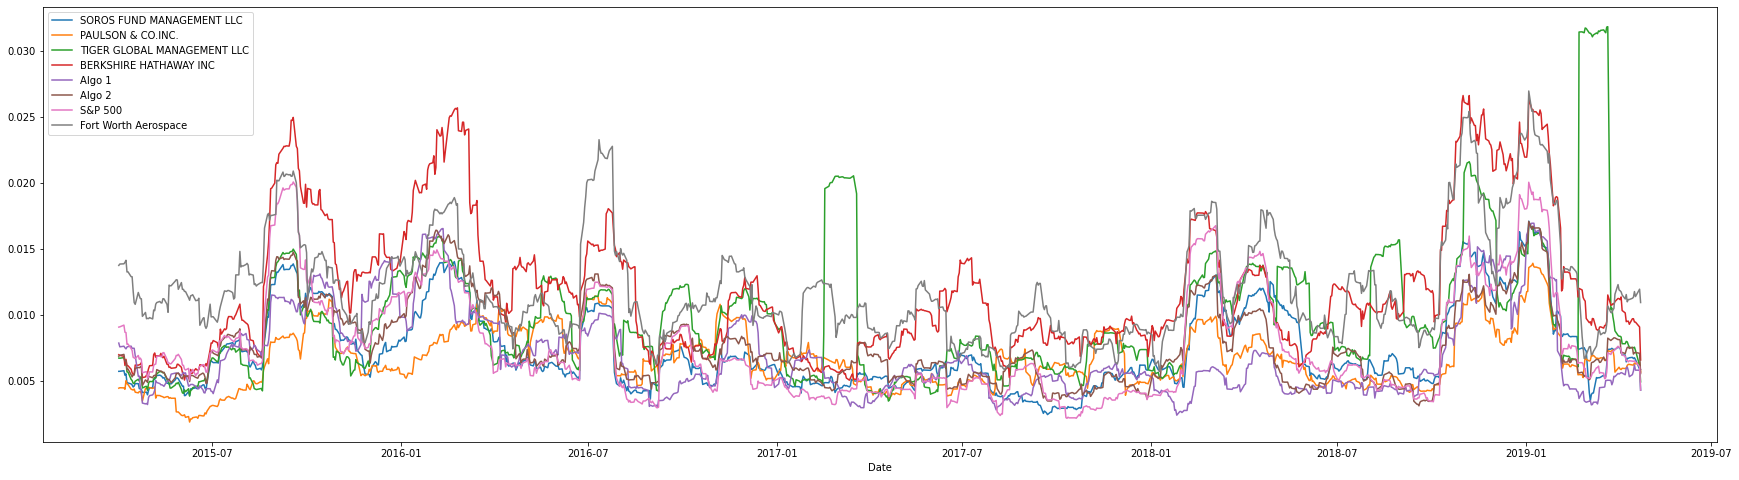

In [44]:
# Calculate rolling standard deviation
new_21 = final.rolling(window = 21).std()
print(new_21)
# Plot rolling standard deviation
new_21.plot(figsize = (30, 8))

### Calculate and plot the correlation

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699961   
PAULSON & CO.INC.                             0.699961            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561246            0.434551   
BERKSHIRE HATHAWAY INC                        0.754385            0.545465   
Algo 1                                        0.321175            0.268692   
Algo 2                                        0.826869            0.678214   
S&P 500                                       0.837908            0.669612   
Fort Worth Aerospace                          0.642448            0.493395   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561246   
PAULSON & CO.INC.                               0.434551   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424465 

<AxesSubplot:>

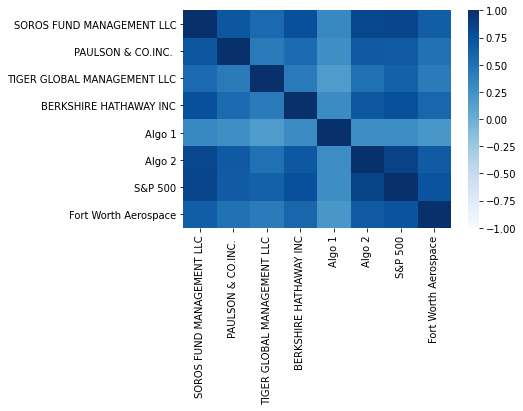

In [45]:
# Calculate and plot the correlation
new_corr = final.corr()
print(new_corr)
sns.heatmap(new_corr, cmap = 'Blues', vmin = -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

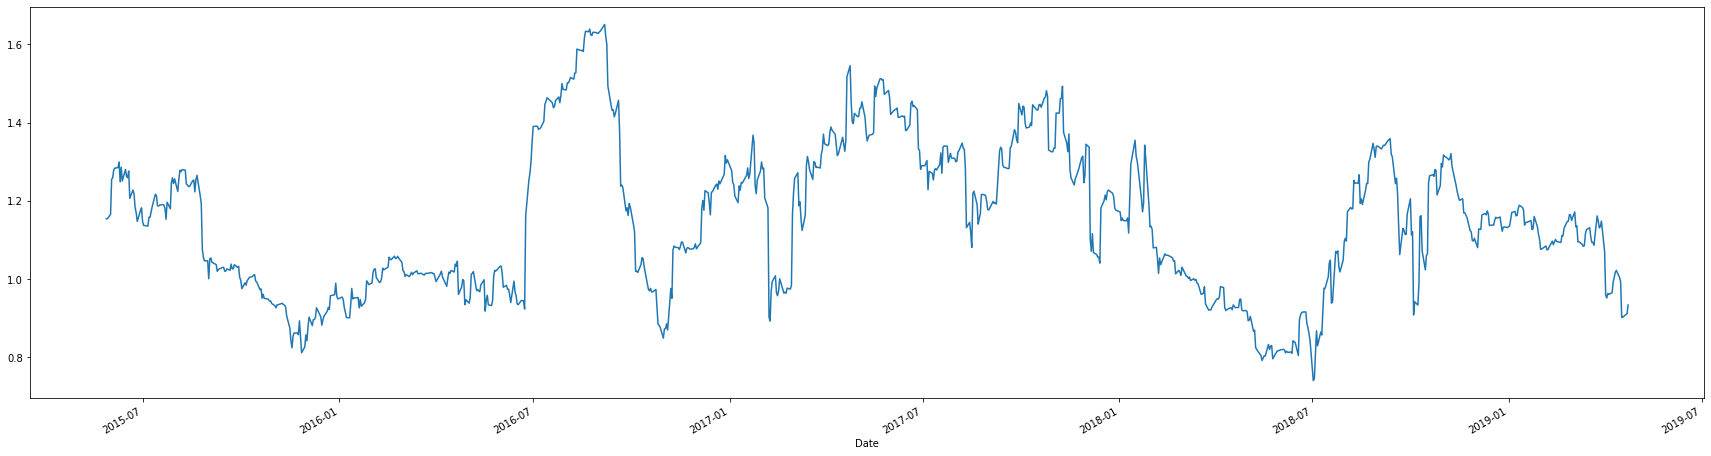

In [40]:
# Calculate and plot Beta
new_cov = final['Fort Worth Aerospace'].rolling(window = 60).cov(final['S&P 500'])
new_beta = new_cov / variance
new_beta.plot(figsize = (30, 8))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [46]:
# Calculate Annualzied Sharpe Ratios
new_sharpe = final.mean() / final.std() * np.sqrt(252)
new_sharpe.head()

SOROS FUND MANAGEMENT LLC      0.359034
PAULSON & CO.INC.             -0.473108
TIGER GLOBAL MANAGEMENT LLC   -0.120425
BERKSHIRE HATHAWAY INC         0.629941
Algo 1                         1.383268
dtype: float64

<AxesSubplot:>

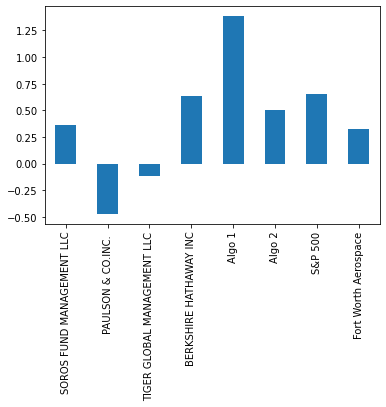

In [42]:
# Visualize the sharpe ratios as a bar plot
new_sharpe.plot.bar()

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-04                   1.002230            1.003241   
2015-03-05                   1.006255            1.007331   
2015-03-06                   0.998300            1.003730   
2015-03-09                   0.998881            1.007971   
2015-03-10                   0.988630            1.002588   
...                               ...                 ...   
2019-04-16                   1.162436            0.790750   
2019-04-17                   1.159068            0.785636   
2019-04-18                   1.160747            0.786596   
2019-04-22                   1.157745            0.780828   
2019-04-23                   1.166043            0.783549   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-04                     0.997466             

<AxesSubplot:xlabel='Date'>

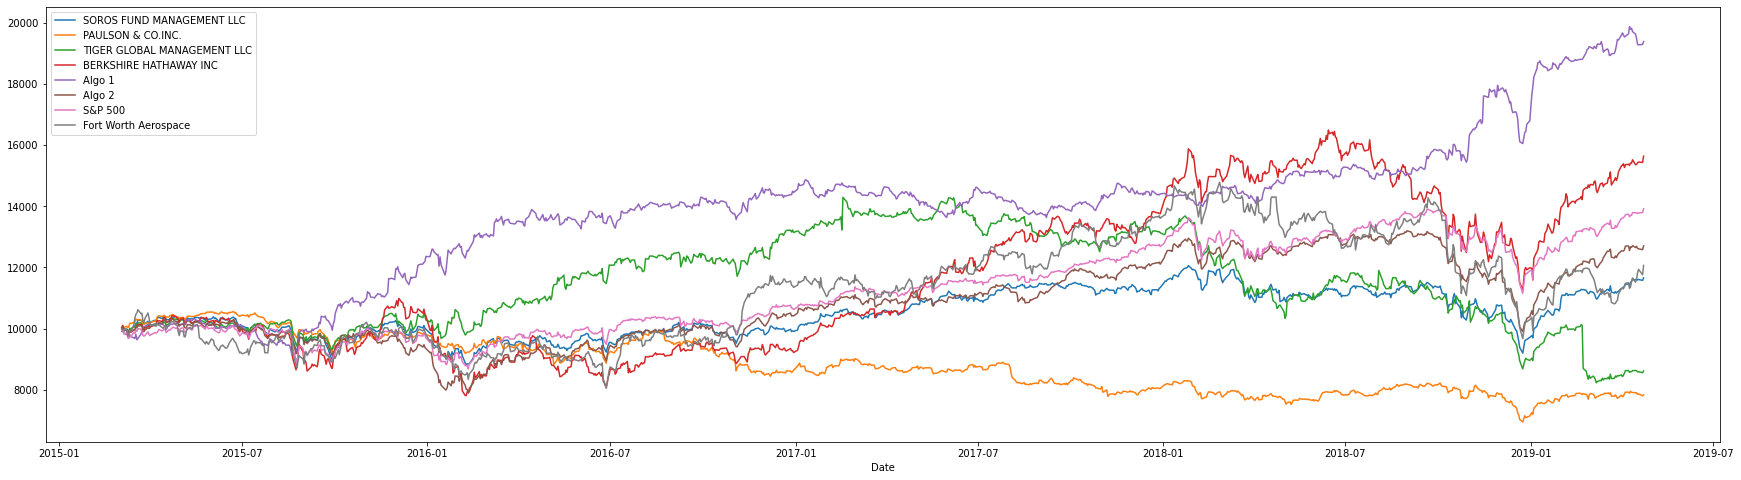

In [47]:
# Calculate and Display Cumulative Returns
new_cume = (1 + final).cumprod()
print(new_cume)
(10000 * new_cume).plot(figsize = (30, 8))

## The 'Fort Worth Aerospace' portfolio outperforms 3 of the whale portfolios but not the S & P index, Berkshire Hathaway, or the trading algorithms.